<a href="https://www.kaggle.com/code/dataranch/gun-violence-forecast-interactive?scriptVersionId=111737108" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <div style="text-align: center; background-color: blue; color: white; padding: 14px; line-height: 1;border-radius:20px">**Gun Violence Dataset | Time Series Forecasting 📊**</div>

# <div style="text-align: center; background-color: white; color: black; padding: 14px; line-height: 1;border-radius:20px">https://gunmemorial.org</div>

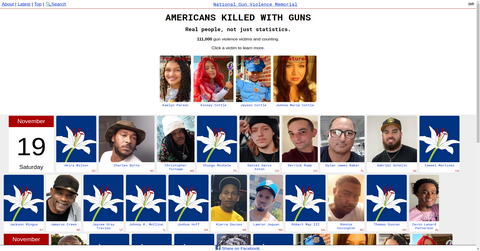

<div style="text-align: center; 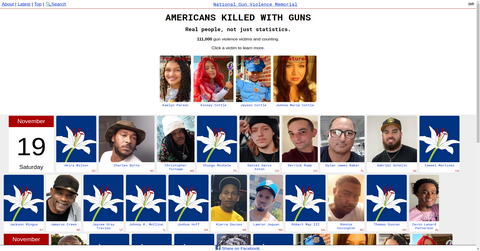"/>

In [1]:
import pandas as pd
# Quick EDA
import pandas_profiling
import numpy as np

# Packages for forecasting
# =======================
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

# <div style="text-align: center; background-color: blue; color: white; padding: 14px; line-height: 1;border-radius:20px">**Variables**</div>

In [2]:
# Region to narrow down forecast
# Set to None to remove filter
FOCUS_CITY = None
#FOCUS_STATE = None
#FOCUS_CITY = 'Houston'
FOCUS_STATE = 'Texas'
#Start data after this point
CUTOFF_DATE = '2014-01-01'
Y_COL = 'Total'
DATE_COL = 'Incident Date'
# Periods (default=weeks)
PERIODS_TO_FORECAST = 150

In [3]:
if FOCUS_STATE:
    FOCUS_STATE = FOCUS_STATE.lower()
if FOCUS_CITY:
    FOCUS_CITY = FOCUS_CITY.lower()

In [4]:
ms_df = pd.read_csv('../input/gun-violence-incidents-in-the-usa/mass_shootings.csv')
all_df = pd.read_csv('../input/gun-violence-incidents-in-the-usa/all_incidents.csv')

In [5]:
len(all_df)

472820

In [6]:
len(ms_df)

3609

In [7]:
#Make both dataframes have the same feature names
rename_object = {
    'incident_id': 'Incident ID',
    'date': 'Incident Date',
    'state': 'State',
    'city': 'City Or County',
    'address': 'Address',
    'n_killed': 'Killed',
    'n_injured': 'Injured',
}
ms_df.rename(columns=rename_object, inplace=True)
all_df.rename(columns=rename_object, inplace=True)

In [8]:
ms_df

,Incident ID,Incident Date,State,City Or County,Address,# Killed,# Injured
0,271363,"December 29, 2014",Louisiana,New Orleans,Poydras and Bolivar,0,4
1,269679,"December 27, 2014",California,Los Angeles,8800 block of South Figueroa Street,1,3
2,270036,"December 27, 2014",California,Sacramento,4000 block of May Street,0,4
3,269167,"December 26, 2014",Illinois,East St. Louis,2500 block of Summit Avenue,1,3
4,268598,"December 24, 2014",Missouri,Saint Louis,18th and Pine,1,3
...,...,...,...,...,...,...,...
3604,274867,"January 6, 2015",Florida,Miami,1300 block of NW 62nd Street,1,3
3605,273535,"January 4, 2015",Virginia,Roanoke,3634 Shenandoah Ave NW,2,4
3606,273397,"January 4, 2015",Texas,Dallas,2000 block of Ben Hur St.,3,1
3607,273965,"January 2, 2015",Georgia,Savannah,500 block of W. 54th Street,1,4


In [9]:
# Inner join on ID
#joined_df = ms_df.merge(all_df, on='Incident ID', how='inner')

In [10]:
joined_df = all_df
joined_df

,Incident ID,Incident Date,State,City Or County,Address,Killed,Injured
0,2314858,2022-05-28,Arkansas,Little Rock,W 9th St and Broadway St,0,1
1,2314409,2022-05-28,Colorado,Denver,3300 block of Clay St,0,1
2,2314498,2022-05-28,Missouri,Saint Louis,Page Blvd and Vandeventer Ave,0,1
3,2314485,2022-05-28,South Carolina,Florence,Old River Rd,0,2
4,2314483,2022-05-28,California,Carmichael,4400 block of Manzanita Ave,1,0
...,...,...,...,...,...,...,...
472815,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2
472816,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0
472817,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3
472818,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3


In [11]:
if FOCUS_STATE:
    joined_df = joined_df.loc[joined_df['State'].str.lower() == FOCUS_STATE]
if FOCUS_CITY:
    joined_df = joined_df.loc[joined_df['City Or County'].str.lower() == FOCUS_CITY]

In [12]:
joined_df['Total'] = joined_df['Killed'] + joined_df['Injured']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
joined_df = joined_df.copy()

# <div style="text-align: center; background-color: blue; color: white; padding: 14px; line-height: 1;border-radius:20px">**EDA**</div>

In [14]:
joined_df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
joined_df

,Incident ID,Incident Date,State,City Or County,Address,Killed,Injured,Total
23,2314864,2022-05-28,Texas,Laredo,4400 block of Exodus Dr,0,1,1
26,2314540,2022-05-28,Texas,Fort Worth,E Vickery Blvd and Belzsie Terrace,0,1,1
45,2314583,2022-05-28,Texas,Fort Worth,6000 block of Stoneybrook Dr,1,0,1
66,2313687,2022-05-27,Texas,Houston,Trevor Way and Cypress Preserve Park Dr,1,0,1
94,2313713,2022-05-27,Texas,Donna,900 N Val Verde Rd,0,3,3
...,...,...,...,...,...,...,...,...
472617,480605,2013-09-20,Texas,Rice,700 block of NW 0149,5,0,5
472656,491698,2013-08-07,Texas,Dallas,7100 block of Long Canyon Trail,4,4,8
472667,491287,2013-07-28,Texas,Dallas,2400 block of Royal Lane,0,4,4
472697,490245,2013-07-01,Texas,Fort Worth,2900 block of Pate Drive,4,0,4


# <div style="text-align: center; background-color: blue; color: white; padding: 14px; line-height: 1;border-radius:20px">**Resampling**</div>

In [16]:
joined_df['Incident Date'] = pd.to_datetime(joined_df['Incident Date'])

# groupby week
resampled_df = joined_df.resample('W', on='Incident Date').sum()

resampled_df = resampled_df.reset_index()

In [17]:
resampled_df

,Incident Date,Incident ID,Killed,Injured,Total
0,2013-06-16,487891,1,3,4
1,2013-06-23,0,0,0,0
2,2013-06-30,0,0,0,0
3,2013-07-07,490245,4,0,4
4,2013-07-14,0,0,0,0
...,...,...,...,...,...
463,2022-05-01,169510663,35,59,94
464,2022-05-08,163019692,35,57,92
465,2022-05-15,218592420,40,97,137
466,2022-05-22,170706215,43,44,87


In [18]:
# Drop inconsistent data
resampled_df = resampled_df[resampled_df['Incident Date'] > CUTOFF_DATE]

In [19]:
resampled_df.groupby('Incident Date')['Killed'].sum()

Incident Date
2014-01-05    13
2014-01-12    16
2014-01-19    32
2014-01-26    24
2014-02-02    24
              ..
2022-05-01    35
2022-05-08    35
2022-05-15    40
2022-05-22    43
2022-05-29    44
Name: Killed, Length: 439, dtype: int64

In [20]:
resampled_df

,Incident Date,Incident ID,Killed,Injured,Total
29,2014-01-05,6118659,13,24,37
30,2014-01-12,6893222,16,22,38
31,2014-01-19,11825698,32,28,60
32,2014-01-26,8247161,24,25,49
33,2014-02-02,7375693,24,25,49
...,...,...,...,...,...
463,2022-05-01,169510663,35,59,94
464,2022-05-08,163019692,35,57,92
465,2022-05-15,218592420,40,97,137
466,2022-05-22,170706215,43,44,87


In [21]:
del(resampled_df['Incident ID'])

In [22]:
resampled_df.groupby('Incident Date')[Y_COL].sum().plot()

<AxesSubplot:xlabel='Incident Date'>

In [23]:
resampled_df.iloc[resampled_df['Total'].idxmax()]

Incident Date    2022-05-22 00:00:00
Killed                            43
Injured                           44
Total                             87
Name: 466, dtype: object

In [24]:
resampled_df

,Incident Date,Killed,Injured,Total
29,2014-01-05,13,24,37
30,2014-01-12,16,22,38
31,2014-01-19,32,28,60
32,2014-01-26,24,25,49
33,2014-02-02,24,25,49
...,...,...,...,...
463,2022-05-01,35,59,94
464,2022-05-08,35,57,92
465,2022-05-15,40,97,137
466,2022-05-22,43,44,87


# <div style="text-align: center; background-color: blue; color: white; padding: 14px; line-height: 1;border-radius:20px">**Forecast**</div>

In [25]:
df = resampled_df.copy()
df.rename(columns={Y_COL: 'y', DATE_COL: 'ds'}, inplace=True)
df['ds'] = pd.to_datetime(df['ds'])
df = df[['ds', 'y']]
m = Prophet(seasonality_mode='multiplicative')
m.fit(df)
future = m.make_future_dataframe(periods=PERIODS_TO_FORECAST, freq='W')
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
plot_plotly(m, forecast)

10:27:21 - cmdstanpy - INFO - Chain [1] start processing
10:27:21 - cmdstanpy - INFO - Chain [1] done processing


# <div style="text-align: center; background-color: blue; color: white; padding: 14px; line-height: 1;border-radius:20px">**Cross Validation**</div>

In [26]:
# Train on first 4 years of data
# Prediction horizon of 1 year
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='1460 days', horizon = '365 days', parallel='processes')

10:27:23 - cmdstanpy - INFO - Chain [1] start processing
10:27:23 - cmdstanpy - INFO - Chain [1] start processing
10:27:23 - cmdstanpy - INFO - Chain [1] start processing
10:27:23 - cmdstanpy - INFO - Chain [1] start processing
10:27:23 - cmdstanpy - INFO - Chain [1] done processing
10:27:23 - cmdstanpy - INFO - Chain [1] done processing
10:27:23 - cmdstanpy - INFO - Chain [1] done processing
10:27:23 - cmdstanpy - INFO - Chain [1] done processing
10:27:24 - cmdstanpy - INFO - Chain [1] start processing
10:27:24 - cmdstanpy - INFO - Chain [1] start processing
10:27:24 - cmdstanpy - INFO - Chain [1] start processing
10:27:24 - cmdstanpy - INFO - Chain [1] done processing
10:27:24 - cmdstanpy - INFO - Chain [1] done processing
10:27:24 - cmdstanpy - INFO - Chain [1] done processing


In [27]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-06-03,49.966661,35.296124,63.945760,52,2018-05-30
1,2018-06-10,49.905495,34.052970,63.511860,55,2018-05-30
2,2018-06-17,50.213251,35.192366,65.129985,52,2018-05-30
3,2018-06-24,50.237425,35.045823,64.652234,42,2018-05-30
4,2018-07-01,51.022754,36.517671,65.756213,63,2018-05-30
...,...,...,...,...,...,...
360,2022-05-01,98.649073,83.059005,115.004302,94,2021-05-29
361,2022-05-08,103.419045,87.268528,118.736729,92,2021-05-29
362,2022-05-15,108.411264,91.899520,123.619629,137,2021-05-29
363,2022-05-22,109.770123,93.373234,125.551364,87,2021-05-29


In [28]:
df_cv['cutoff'].value_counts()

2021-05-29 00:00:00    53
2018-05-30 00:00:00    52
2018-11-28 12:00:00    52
2019-05-30 00:00:00    52
2019-11-28 12:00:00    52
2020-05-29 00:00:00    52
2020-11-27 12:00:00    52
Name: cutoff, dtype: int64

In [29]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,36 days 00:00:00,344.847293,18.570064,13.254019,0.161175,0.122976,0.178451,0.694444
1,36 days 12:00:00,357.659930,18.911899,13.765378,0.165286,0.138252,0.183055,0.666667
2,37 days 00:00:00,365.034357,19.105872,14.165324,0.169718,0.163136,0.188016,0.638889
3,37 days 12:00:00,366.844103,19.153175,14.197168,0.170497,0.163136,0.189096,0.638889
4,38 days 00:00:00,337.073059,18.359550,13.429341,0.162515,0.138252,0.178743,0.666667
...,...,...,...,...,...,...,...,...
325,359 days 12:00:00,613.878641,24.776574,20.781982,0.244146,0.242930,0.266769,0.388889
326,360 days 00:00:00,637.072730,25.240300,21.074530,0.246024,0.242930,0.269797,0.388889
327,360 days 12:00:00,641.623870,25.330295,21.168392,0.246679,0.242930,0.270735,0.388889
328,361 days 00:00:00,652.128215,25.536801,21.592225,0.251703,0.252028,0.276868,0.361111


In [30]:
df_p.describe().T

,count,mean,std,min,25%,50%,75%,max
horizon,330,199 days 00:06:32.727272728,95 days 09:34:50.634356496,36 days 00:00:00,115 days 15:00:00,198 days 18:00:00,281 days 21:00:00,365 days 00:00:00
mse,330.0,357.679058,109.119191,163.930142,281.638498,354.740799,429.307711,656.763446
rmse,330.0,18.684883,2.929197,12.803521,16.782089,18.834564,20.719742,25.627396
mae,330.0,14.851055,2.637787,10.218766,12.825524,14.772004,16.676244,21.828753
mape,330.0,0.189299,0.027984,0.14112,0.166614,0.18477,0.211768,0.252897
mdape,330.0,0.166549,0.035243,0.085757,0.141677,0.167663,0.187254,0.252028
smape,330.0,0.202169,0.032154,0.147971,0.177885,0.200067,0.227857,0.277606
coverage,330.0,0.601936,0.101202,0.361111,0.527778,0.611111,0.6875,0.777778


# <div style="text-align: center; background-color: blue; color: white; padding: 14px; line-height: 1;border-radius:20px">**MAPE**</div>

In [31]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')
fig.show()

/opt/conda/lib/python3.7/site-packages/prophet/plot.py:544: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.

/opt/conda/lib/python3.7/site-packages/prophet/plot.py:545: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.

